## <center> Определение лучшего тарифа </center>
___
### <center> Статистический анализ данных </center>
___
___

### Описание проекта

___
Федеральный оператор сотовой связи «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.   
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
___
___

### <center> Описание тарифов </center>
___

<table class="table_dark">
	<tbody>
		<tr>
			<td rowspan="2"><b>Тариф</b></td>
			<td rowspan="2"><b>Ежемесячная плата</b></td>
			<td colspan="3"><center><b>Включено</b></center></td>
			<td colspan="3"><center><b>Стоимость услуг сверх тарифного пакета</b></center></td>
		</tr>
		<tr>
			<td>Минуты разговора</td>
			<td>Сообщения (шт.)</td>
			<td>Интернет (Гб)</td>
			<td>Минута разговора</td>
			<td>Сообщение (руб. за 1 шт.)</td>
			<td>1 Гб интернета</td>
		</tr>
		<tr>
			<td>"Смарт"</td>
			<td>550</td>
			<td>500</td>
			<td>50</td>
			<td>15</td>
			<td>3</td>
			<td>3</td>
			<td>200</td>
		</tr>
		<tr>
			<td>"Ультра"</td>
			<td>1950</td>
			<td>3000</td>
			<td>1000</td>
			<td>30</td>
			<td>1</td>
			<td>1</td>
			<td>150</td>
		</tr>
	</tbody>
</table>


***Примечание***: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
___
___

### Состав проекта
<a id = 'back'></a>
___
[1. Шаг 1. Изучение представленных данных](#step_1)   
   
   - [1.1. Данные о пользователях](#users_data)
   - [1.2. Данные о звонках](#calls_data)
   - [1.3. Данные о сообщениях](#messages_data)
   - [1.4. Интернет данные](#internet_data)
   - [1.5. Данные по тарифам](#tariffs_data)
   - [1.6. Выводы](#conclusions)
   
[2. Шаг 2. Подготовка данных](#step_2)   

   - [2.1. Изменение типа данных и добавление новых столбцов](#changing_types)
   - [2.2. Помесячные расчеты](#calculations)
   
[3. Шаг 3. Анализ данных](#step_3)   

   - [3.1. Выбросы в данных](#3.1.)
   - [3.2. Гистограммы по тарифам](#3.2.)
   
[4. Шаг 4. Проверка гипотез](#step_4)   

   - [4.1. Средняя выручка абонентов в зависимости от тарифа](#4.1.)   
   - [4.2. Средняя выручка абонентов в зависимости от региона](#4.2.)
   
[5. Шаг 5. Общий вывод](#step_5)   
   
___
___

### Описание данных
___
#### Таблица *users* (информация о пользователях):   

 - *'user_id'* — уникальный идентификатор пользователя   
 - *'first_name'* — имя пользователя   
 - *'last_name'* — фамилия пользователя   
 - *'age'* — возраст пользователя (годы)   
 - *'reg_date'* — дата подключения тарифа (день, месяц, год)   
 - *'churn_date'* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)   
 - *'city'* — город проживания пользователя   
 - *'tariff'* — название тарифного плана   

#### Таблица *calls* (информация о звонках):   

 - *'id'* — уникальный номер звонка
 - *'call_date'* — дата звонка
 - *'duration'* — длительность звонка в минутах
 - *'user_id'* — идентификатор пользователя, сделавшего звонок

#### Таблица *messages* (информация о сообщениях):   

 - *'id'* — уникальный номер сообщения
 - *'message_date'* — дата сообщения
 - *'user_id'* — идентификатор пользователя, отправившего сообщение

#### Таблица *internet* (информация об интернет-сессиях):   

 - *'id'* — уникальный номер сессии
 - *'mb_used'* — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - *'session_date'* — дата интернет-сессии
 - *'user_id'* — идентификатор пользователя

#### Таблица *tariffs* (информация о тарифах):   

 - *'tariff_name'* — название тарифа
 - *'rub_monthly_fee'* — ежемесячная абонентская плата в рублях
 - *'minutes_included'* — количество минут разговора в месяц, включённых в абонентскую плату
 - *'messages_included'* — количество сообщений в месяц, включённых в абонентскую плату
 - *'mb_per_month_included'* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - *'rub_per_minute'* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - *'rub_per_message'* — стоимость отправки сообщения сверх тарифного пакета
 - *'rub_per_gb'* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

___
___

# <center> ВЫПОЛНЕНИЕ ПРОЕКТА </center>
___
___
___

Импортируем нужные библиотеки.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

___
<a id = 'step_1'></a>
### Шаг 1. Изучение общей информации
___
___

In [14]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [18]:
users.to_csv(r'C:\users.csv', index = False)

[*к содержанию*](#back)

___
<a id = 'users_data'></a>
- **1.1. Данные о пользователях**

In [12]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 30)

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
print("Количество дубликатов:", users.duplicated().sum())

Количество дубликатов: 0


___
Пропуски только в данных *'churn_date'*.   
Согласно условию задачи это дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).   
Пропуски не требуют обработки.   
Дубликаты отсутствуют.

[*к содержанию*](#back)

___
<a id = 'calls_data'></a>
 - **1.2. Данные о звонках**

In [6]:
display(calls.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
print("Количество дубликатов:", calls.duplicated().sum())

Количество дубликатов: 0


___
Пропуски отсутствуют.   
Дубликаты отсутствуют.   
Построим гистограмму по длительности звонков.

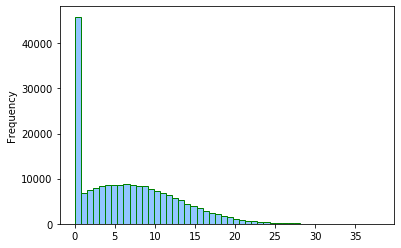

In [9]:
plt.style.use('seaborn-pastel')
calls['duration'].plot(kind = 'hist', ec = 'green', bins = 50)

___
Слишком большой пик на нуле.   
В условии сказано, что оператор округляет звонки до целых минут в большую сторону.   
При этом ранее мы видели, что данные выгружены буз округления.   
Посмотрим есть ли звонки меньше минуты, но больше нуля.   

In [10]:
display(calls.query('0 < duration <= 1'))

,id,call_date,duration,user_id
55,1000_55,2018-09-19,0.31,1000
65,1000_65,2018-10-28,0.34,1000
97,1000_97,2018-10-26,0.33,1000
122,1000_122,2018-10-07,0.13,1000
135,1000_135,2018-10-25,0.02,1000
...,...,...,...,...
202484,1499_97,2018-12-22,0.07,1499
202537,1499_150,2018-12-09,0.56,1499
202545,1499_158,2018-11-16,0.64,1499
202579,1499_192,2018-12-07,0.76,1499


Округлим длительность звонков и обновим гистограмму.

In [11]:
calls['duration'] = calls['duration'].apply(np.ceil)
display(calls.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


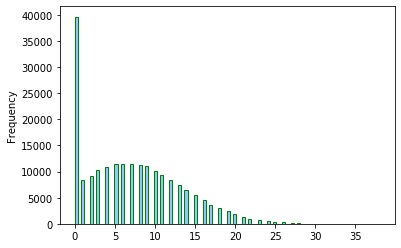

In [12]:
calls['duration'].plot(kind = 'hist', ec = 'green', bins = 100)

___
Всё ещё много звонков с нулевой длительностью.   
Скорее всего так учтены звонки, при которых связь не состоялась (другой абонент не взял трубку, сбросил или что-то подобное).   
Такие звонки не оплачиваются абонентом, следовательно не помогут нам в решении поставленной задачи.   
Избавимся от таких строк.

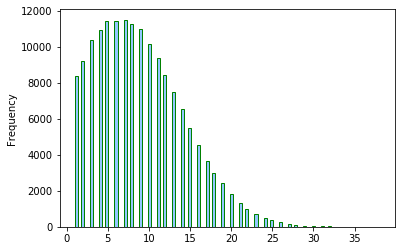

In [13]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()
calls['duration'].plot(kind = 'hist', ec = 'green', bins = 100)

___
Теперь с эти можно работать.

[*к содержанию*](#back)

___
<a id = 'messages_data'></a>
- **1.3. Данные о сообщениях**

In [14]:
display(messages.head(10))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
print("Количество дубликатов:", messages.duplicated().sum())

Количество дубликатов: 0


___
Пропуски отсутствуют.   
Дубликаты отсутствуют.

[*к содержанию*](#back)

___
<a id = 'internet_data'></a>
- **1.4. Интернет данные**

In [17]:
display(internet.head(10))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [19]:
print("Количество дубликатов:", internet.duplicated().sum())

Количество дубликатов: 0


___
Пропуски отсутствуют.   
Дубликаты отсутствуют.   
Построим гистограмму использованного траффика. 

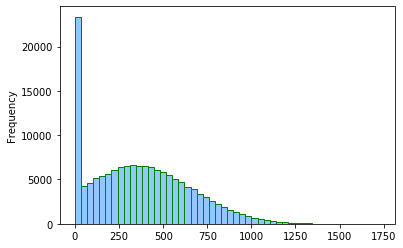

In [20]:
internet['mb_used'].plot(kind = 'hist', ec = 'green', bins = 50)

___
Слишком большой пик на нуле.   
В условии сказано, что оператор округляет траффик до целых мегабайт в большую сторону.   
При этом ранее мы видели, что данные выгружены буз округления.   
Округлим траффик и обновим гистограмму.   

In [21]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
display(internet.head(10))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000
5,5,1000_5,400.0,2018-10-02,1000
6,6,1000_6,541.0,2018-09-07,1000
7,7,1000_7,416.0,2018-07-11,1000
8,8,1000_8,506.0,2018-10-08,1000
9,9,1000_9,346.0,2018-09-03,1000


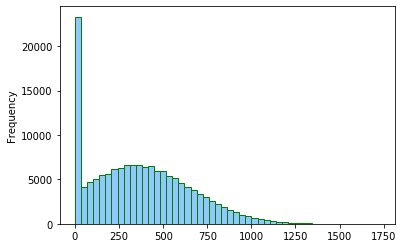

In [22]:
internet['mb_used'].plot(kind = 'hist', ec = 'green', bins = 50)

___
Всё ещё много нулевого траффика.   
По аналогии со звонками - скорее всего этим учтены попытки несостоящегося соединения.   
Нулевой траффик не оплачивается абонентом, следовательно не поможет нам в решении поставленной задачи.   
Избавимся от таких строк.

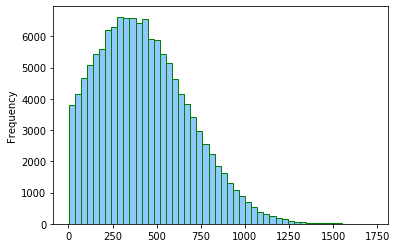

In [23]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()
internet['mb_used'].plot(kind = 'hist', ec = 'green', bins = 50)

[*к содержанию*](#back)

___
<a id = 'tariffs_data'></a>
- **1.5. Данные по тарифам**

In [24]:
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


___
Это просто описание тарифов, аналогичное я представил в описании задания.   
При необходимости будем использовать для формирования сводных таблиц.

[*к содержанию*](#back)

___
<a id = 'conclusions'></a>
- **1.6. Выводы**

Представленные для анализа данные довольно чистые.   
Были убраны данные, бесполезные для решения поставленной задачи: 0.00 мБ израсходованного траффика и 0.00 секунд разговора не округляются вверх и, соответственно, не оплачиваются.   
Далее требуется:   
1. *'users'*
    - меняем тип данных столбца 'reg_date' на datetime;   
    - добавляем столбцы с годом, месяцем и временем года.   

2. *'calls'*
    - меняем тип данных столбца 'call_date' на datetime;   
    - добавляем столбцы с годом, месяцем и временем года.

3. *'messages'*
    - меняем тип данных столбца 'message_date' на datetime;   
    - добавляем столбцы с годом, месяцем и временем года.

4. *'internet'*
    - меняем тип данных столбца 'session_date' на datetime;   
    - добавляем столбцы с годом, месяцем и временем года.

5. *'tariffs'*
    - оставляем всё как есть.

[*к содержанию*](#back)

___
<a id = 'step_2'></a>
### Шаг 2. Подготовка данных
___
___

___
<a id = 'changing_types'></a>
- **2.1. Изменение типа данных**

___
Напишем функции для определения времени года, перевода в формат 'datetime' и добавления колонок с месяцем и временем года.

In [25]:
def get_season(date):
    if date.month in [1, 2, 12]:
        return 'Зима'
    elif date.month in [3, 4, 5]:
        return 'Весна'
    elif date.month in [6, 7, 8]:
        return 'Лето'
    elif date.month in [9, 10, 11]:
        return 'Осень'

In [26]:
def to_datetime_with_adding_columns(data):
    for df in data:
        for column in df.columns:
            if ('date' in column) & (column != 'churn_date'):
                df[column] = pd.to_datetime(df[column], format = '%Y-%m-%d')
                df['month'] = df[column].apply(lambda x: x.month)
                df['season'] = df[column].apply(get_season)

___
Применим эти функции и проверим результат.

In [27]:
to_datetime_with_adding_columns([users, calls, messages, internet])

In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
month         500 non-null int64
season        500 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 39.2+ KB


In [29]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 6 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
month        162994 non-null int64
season       162994 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.7+ MB


In [30]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 5 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
season          123036 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.7+ MB


In [31]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 7 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
month           129798 non-null int64
season          129798 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 7.9+ MB



Тип данных изменён.   
___

[*к содержанию*](#back)

___
<a id = 'calculations'></a>
- **2.2. Расчёты и добавление новых столбцов**

Посчитаем количество звонков, длительность звонков, количество сообщений и объем израсходованного трафика по месяцам.

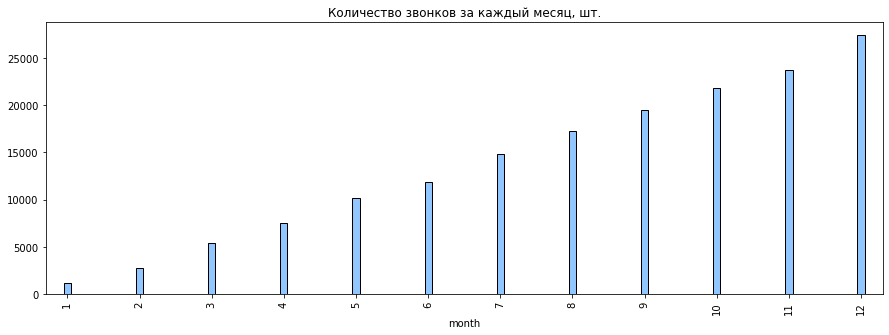

In [32]:
plt.figure(figsize=(15,5))
plot = calls.groupby('month')['id'].count().plot(kind='bar', ec='black', width=0.1, title = 'Количество звонков за каждый месяц, шт.')

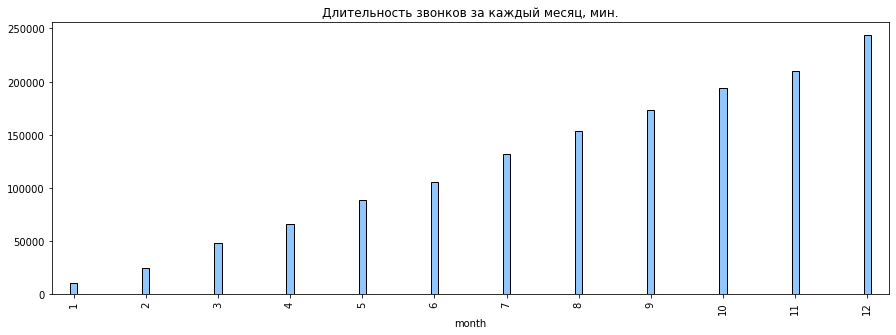

In [33]:
plt.figure(figsize=(15,5))
plot = calls.groupby('month')['duration'].sum().plot(kind='bar', ec='black', width=0.1, title = 'Длительность звонков за каждый месяц, мин.')

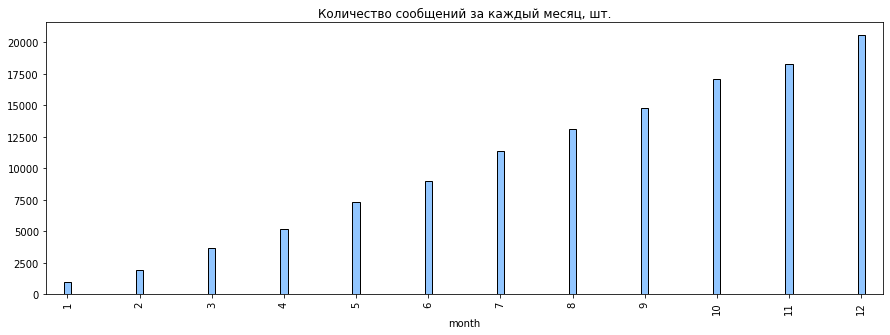

In [34]:
plt.figure(figsize=(15,5))
plot = messages.groupby('month')['id'].count().plot(kind='bar', ec='black', width=0.1, title = 'Количество сообщений за каждый месяц, шт.')

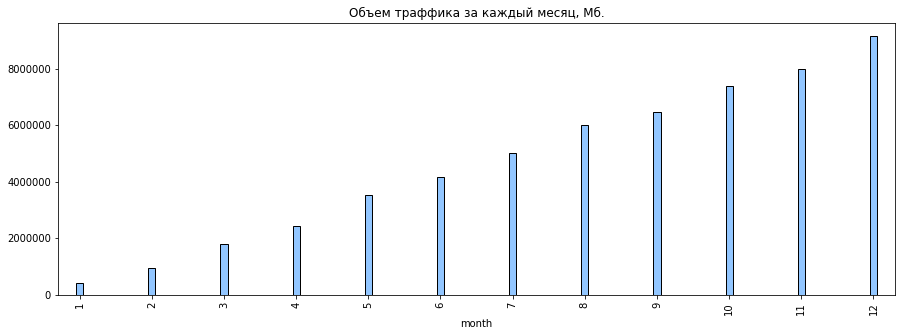

In [35]:
plt.figure(figsize=(15,5))
plot = internet.groupby('month')['mb_used'].sum().plot(kind='bar', ec='black', width=0.1, title = 'Объем траффика за каждый месяц, Мб.')

Данные выглядят странно, стабильный рост каждого показателя к концу года.   
Хотя, если прочитать поставленную задачу: "скорректировать рекламный бюджет", "данные 500 пользователей" (всего 500)... Возможно эти тарифы только запустили в январе 2018 и теперь "Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше".   
Посмотрим сколько пользователей регистрировались в каждом месяце.

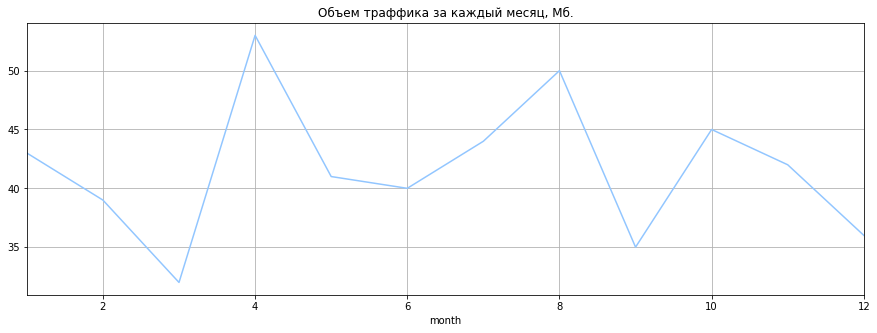

In [36]:
plt.figure(figsize=(15,5))
plot = users.groupby('month')['user_id'].count().plot(kind='line', grid = True, title = 'Объем траффика за каждый месяц, Мб.')

Все логично: каждый месяц по получаем определённое количество новых абонентов, следовательно суммарное их количество увеличивается (при том что за год от тарифов отключились лишь 38 абонентов), следовательно мы имеем такой рост в течение года по количеству звонков и сообщений, длительности звонков и потребляемому траффику. Предположение подтвердилось - это просто новые тарифы.

Для последующих рассчётов по месяцам необходимо создать новый датафрейм с необходимыми нам данными.

In [37]:
calls_duration = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
num_of_messages = messages.groupby(['user_id', 'month'])['id'].count()
internet_traffic = internet.groupby(['user_id', 'month']).sum()['mb_used']
calculation_data = pd.concat([calls_duration, num_of_messages, internet_traffic], axis = 1)
calculation_data = calculation_data.reset_index()
display(calculation_data.head())

,user_id,month,count,sum,id,mb_used
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0


Изменим некоторые названия столбцов.

In [38]:
calculation_data.columns = ['user_id', 'month', 'calls_count', 'calls_duration', 'messages_count', 'traffic']
display(calculation_data.head())

,user_id,month,calls_count,calls_duration,messages_count,traffic
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0


___
Получилось неплохо.   
Добавим ещё тариф и город.

In [39]:
tariff_map = dict(pd.Series(users['tariff'].values, index = users['user_id']))
calculation_data['tariff'] = calculation_data['user_id'].map(tariff_map)

city_map = dict(pd.Series(users['city'].values, index = users['user_id']))
calculation_data['city'] = calculation_data['user_id'].map(city_map)

In [40]:
display(calculation_data.head(10))

,user_id,month,calls_count,calls_duration,messages_count,traffic,tariff,city
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар
8,1001,11,45.0,430.0,NaN,18452.0,smart,Москва
9,1001,12,47.0,414.0,NaN,14053.0,smart,Москва


In [41]:
calculation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id           3214 non-null int64
month             3214 non-null int64
calls_count       3168 non-null float64
calls_duration    3168 non-null float64
messages_count    2717 non-null float64
traffic           3201 non-null float64
tariff            3214 non-null object
city              3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 201.0+ KB


___
Примечательно что в начальных данных не было отсутствующих значений, а при формировании нового датафрейма - они появились.   
С учетом правил его формирования - отсутствующие значения скорее всего вызваны тем, что пользователь не звонил/писал сообщение/выходил в интернет в определенные месяцы. Поэтому просто поставим в этих строках нули.

In [42]:
calculation_data.fillna(0, inplace = True)
calculation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id           3214 non-null int64
month             3214 non-null int64
calls_count       3214 non-null float64
calls_duration    3214 non-null float64
messages_count    3214 non-null float64
traffic           3214 non-null float64
tariff            3214 non-null object
city              3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 201.0+ KB


___
Добавим условия тарифов, для последующих расчетов.   
Абонентская плата:

In [43]:
tariff_cost = {'smart':550, 'ultra':1950}
calculation_data['tariff_cost'] = calculation_data['tariff'].map(tariff_cost)

In [83]:
f'Количество уникальных пользователей : {calculation_data.user_id.nunique()}'

'Количество уникальных пользователей : 498'

Для подсчёта превышения пользования услугами сверх пакета напишем функции и добавим новые колонки.

In [44]:
def calls_overrun(row):
    if row['tariff'] == 'smart':
        result = row['calls_duration'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['calls_duration'] - 3000
        return np.where(result > 0, result, 0)
    
    
def messages_overrun(row):
    if row['tariff'] == 'smart':
        result = row['messages_count'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['messages_count'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_overrun(row):
    if row['tariff'] == 'smart':
        result = row['traffic'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['traffic'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_revenue_for_overrun(row):
    sum_per_month = 0
    if row['tariff'] == 'smart':
        sum_per_month += np.ceil(row['minutes_overrun']) * 3
        sum_per_month += row['messages_overrun'] * 3
        sum_per_month += np.ceil(row['traffic_overrun']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['minutes_overrun']) * 1
        sum_per_month += row['messages_overrun'] * 1
        sum_per_month += np.ceil(row['traffic_overrun']/1024) * 150
        return sum_per_month

Добавляем новые столбцы.

In [45]:
calculation_data['minutes_overrun'] = calculation_data.apply(calls_overrun, axis = 1)
calculation_data['messages_overrun'] = calculation_data.apply(messages_overrun, axis = 1)
calculation_data['traffic_overrun'] = calculation_data.apply(internet_overrun, axis = 1)
calculation_data['payment_over_the_limit'] = calculation_data.apply(month_revenue_for_overrun, axis = 1)

for column in ['minutes_overrun', 'traffic_overrun']:
    calculation_data[column] = calculation_data[column].astype('float')

for column in ['messages_overrun', 'payment_over_the_limit']:
    calculation_data[column] = calculation_data[column].astype('int')

In [46]:
display(calculation_data.head(10))

,user_id,month,calls_count,calls_duration,messages_count,traffic,tariff,city,tariff_cost,minutes_overrun,messages_overrun,traffic_overrun,payment_over_the_limit
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,1950,0.0,0,0.0,0
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,1950,0.0,0,0.0,0
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1950,0.0,0,0.0,0
8,1001,11,45.0,430.0,0.0,18452.0,smart,Москва,550,0.0,0,3092.0,800
9,1001,12,47.0,414.0,0.0,14053.0,smart,Москва,550,0.0,0,0.0,0


Суммируем абонентскую плату и плату за превышение месячного лимита, результат добавляем в новую колонку.

In [47]:
calculation_data['monthly_payment'] = calculation_data['tariff_cost'] + calculation_data['payment_over_the_limit']

In [48]:
display(calculation_data.head(10))

,user_id,month,calls_count,calls_duration,messages_count,traffic,tariff,city,tariff_cost,minutes_overrun,messages_overrun,traffic_overrun,payment_over_the_limit,monthly_payment
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
8,1001,11,45.0,430.0,0.0,18452.0,smart,Москва,550,0.0,0,3092.0,800,1350
9,1001,12,47.0,414.0,0.0,14053.0,smart,Москва,550,0.0,0,0.0,0,550


Посмотрим как много клиентов превышают лимит.

In [49]:
calculation_data[calculation_data['monthly_payment'] > 1950]

,user_id,month,calls_count,calls_duration,messages_count,traffic,tariff,city,tariff_cost,minutes_overrun,messages_overrun,traffic_overrun,payment_over_the_limit,monthly_payment
67,1009,7,20.0,183.0,14.0,24752.0,smart,Пермь,550,0.0,0,9392.0,2000,2550
68,1009,8,27.0,249.0,9.0,23738.0,smart,Пермь,550,0.0,0,8378.0,1800,2350
83,1011,8,58.0,515.0,15.0,21526.0,smart,Самара,550,15.0,0,6166.0,1445,1995
86,1011,11,52.0,501.0,12.0,25332.0,smart,Самара,550,1.0,0,9972.0,2003,2553
87,1011,12,44.0,361.0,6.0,22900.0,smart,Самара,550,0.0,0,7540.0,1600,2150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1496,8,62.0,527.0,41.0,23560.0,smart,Вологда,550,27.0,0,8200.0,1881,2431
3199,1496,9,58.0,486.0,29.0,26970.0,smart,Вологда,550,0.0,0,11610.0,2400,2950
3200,1496,10,56.0,450.0,35.0,28215.0,smart,Вологда,550,0.0,0,12855.0,2600,3150
3201,1496,11,66.0,662.0,46.0,25092.0,smart,Вологда,550,162.0,0,9732.0,2486,3036


Проанализируем сколько вообще абонентов выхотяд за рамки тарифа и дозаказывают услуги.
Создадим новую колонку, в которой будет эта информация, причем '0' - абонент не превышал лимиты, '1', соответственно, - превышал.   
После отобразим эти данные на круговых диаграммах.

In [50]:
calculation_data['over_limits'] = np.where(calculation_data['payment_over_the_limit'] > 0, 1, 0)

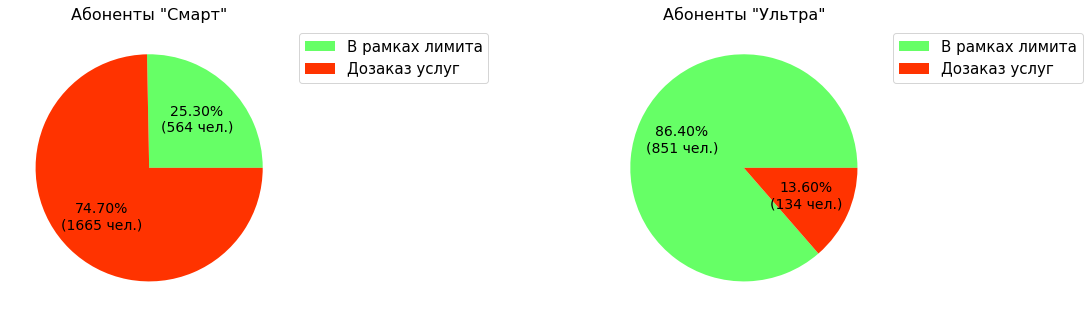

In [51]:
filter_list = ['smart', 'ultra']
titles_list = ['Абоненты "Смарт"', 'Абоненты "Ультра"']
rows = 1
cols = 2
filter_list_counter = 0

sum_smart = calculation_data[calculation_data['tariff'] == 'smart'].count()['user_id']
sum_ultra = calculation_data[calculation_data['tariff'] == 'ultra'].count()['user_id']

annot_labels = ['В рамках лимита', 'Дозаказ услуг']

def func_pct(pct):
    if pct < 75 and pct > 25:
        value = float(pct/100.*sum_smart)
    else:
        value = float(pct/100.*sum_ultra)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)

fig, axes = plt.subplots(rows, cols, figsize=(20,10))

for r in range(rows):
    for c in range(cols):
        if filter_list[filter_list_counter] == 'smart':
            colors = ['#66FF66', '#FF3300']
        else:
            colors = ['#66FF66', '#FF3300']
        curr_filtered_df = calculation_data[calculation_data['tariff'] == filter_list[filter_list_counter]].groupby('over_limits')['user_id']
        ax = curr_filtered_df.count().plot(kind='pie', fontsize=14, title=titles_list[filter_list_counter], figsize=(20,5),
                                           autopct=lambda pct: func_pct(pct), ax=axes[c], colors=colors, labels=None)

        filter_list_counter += 1

plt.tight_layout(pad=3)

for ax in axes:
    ax.legend(['В рамках лимита', 'Дозаказ услуг'],  bbox_to_anchor=(1,1), prop={'size':15})
    ax.set_ylabel('')
    ax.title.set_size(16)

Почти 75% абонентов "Смарт" дозаказывают услуги сверх лимита, в то время как для тарифа "Ультра" этот показатель равен почти 14%.   
За что же чаще переплачивают абоненты "Смарт"?

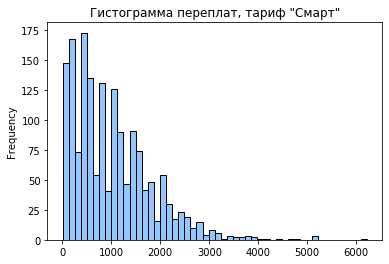

In [52]:
smart_data = calculation_data[(calculation_data['tariff'] == 'smart') & 
                               (calculation_data['payment_over_the_limit'] > 0)]['payment_over_the_limit']
smart_data.plot(kind='hist', title = 'Гистограмма переплат, тариф "Смарт"', ec='black', bins=50)

Большинство переплачивает до 1600 рублей, при абонентской плате в 550 рублей. Осмотрим эту область ближе.

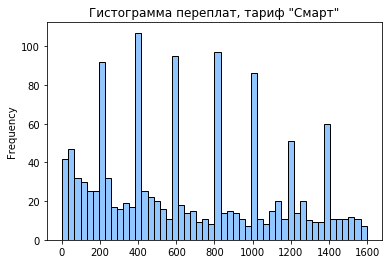

In [53]:
smart_data_lt1600 = calculation_data[(calculation_data['tariff'] == 'smart') & 
                                        (calculation_data['payment_over_the_limit'] > 0) &
                                        (calculation_data['payment_over_the_limit'] < 1600)]['payment_over_the_limit']
smart_data_lt1600.plot(kind='hist', title='Гистограмма переплат, тариф "Смарт"', ec='black', bins=50)

Видим пики, кратные 200. Это говорит о том, что больше всего средств абонентов уходит на оплату интернета сверх лимита тарифа "Смарт".

Исследуем эти же параметры для тарифа "Ультра".

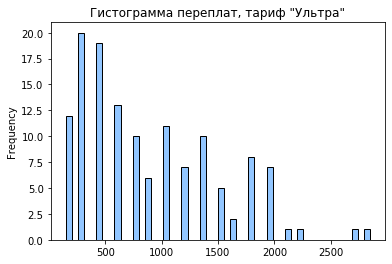

In [54]:
ultra_data = calculation_data[(calculation_data['tariff'] == 'ultra') & 
                               (calculation_data['payment_over_the_limit'] > 0)]['payment_over_the_limit']
ultra_data.plot(kind='hist', title = 'Гистограмма переплат, тариф "Ультра"', ec='black', bins=50)

Большинство переплачивает до 1000 рублей, при абонентской плате в 500 рублей. Осмотрим эту область ближе.

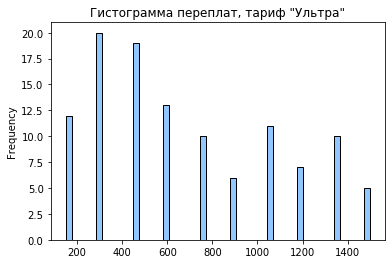

In [55]:
ultra_data_lt1000 = calculation_data[(calculation_data['tariff'] == 'ultra') & 
                                        (calculation_data['payment_over_the_limit'] > 0) &
                                        (calculation_data['payment_over_the_limit'] < 1600)]['payment_over_the_limit']
ultra_data_lt1000.plot(kind='hist', title='Гистограмма переплат, тариф "Ультра"', ec='black', bins=50)

Все данные кратны 150. Это говорит о том, что больше всего средств абонентов уходит на оплату интернета сверх лимита тарифа "Ультра". При этом почти не тратятся деньги на дополнительные минуты и сообщения (по крайней мере до 1500 рублей). Посмотрим какие услуги в принципе дозаказываются чаще всего для каждого из тарифов.

In [56]:
(calculation_data.groupby('tariff').sum()[['minutes_overrun', 'messages_overrun', 'traffic_overrun']]).reset_index()

,tariff,minutes_overrun,messages_overrun,traffic_overrun
0,smart,92739.0,12928,6175667.0
1,ultra,0.0,0,743233.0


Как и показала гистограмма выше - пользователи 'ultra' дозаказывают только интернет, в то время как пользователи 'смарт' - все услуги.   
Сравним суммарную выручку по каждому из тарифов.

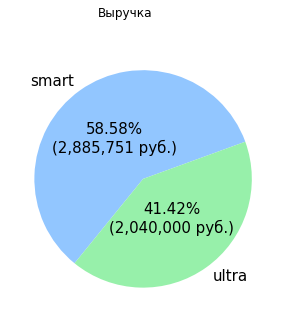

In [57]:
full_calculation = calculation_data['monthly_payment'].sum()


def func_pct(pct):
    value = float(pct/100.*full_calculation)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

axes = calculation_data.groupby('tariff')['monthly_payment'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.set_ylabel('')

[*к содержанию*](#back)

___
<a id = 'step_3'></a>
### Шаг 3. Анализ данных
___
___

___
<a id = '3.1.'></a>
- **3.1. Выбросы в данных**

Построим боксплоты по исследуемым данным для оценки выбросов и последубщей их фильтрации.

In [58]:
def draw_box():
    column_list = ['calls_duration', 'messages_count', 'traffic']
    rows = 1
    cols = 3
    column_list_counter = 0

    fig, axes = plt.subplots(rows, cols, figsize=(40,15))

    for r in range(rows):
        for c in range(cols):
            ax = calculation_data.boxplot(column=column_list[column_list_counter], by='tariff', fontsize=40, ax=axes[c],
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
            ax.set_title(column_list[column_list_counter])
            ax.title.set_size(40)
            ax.set_xlabel('')
            column_list_counter += 1

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

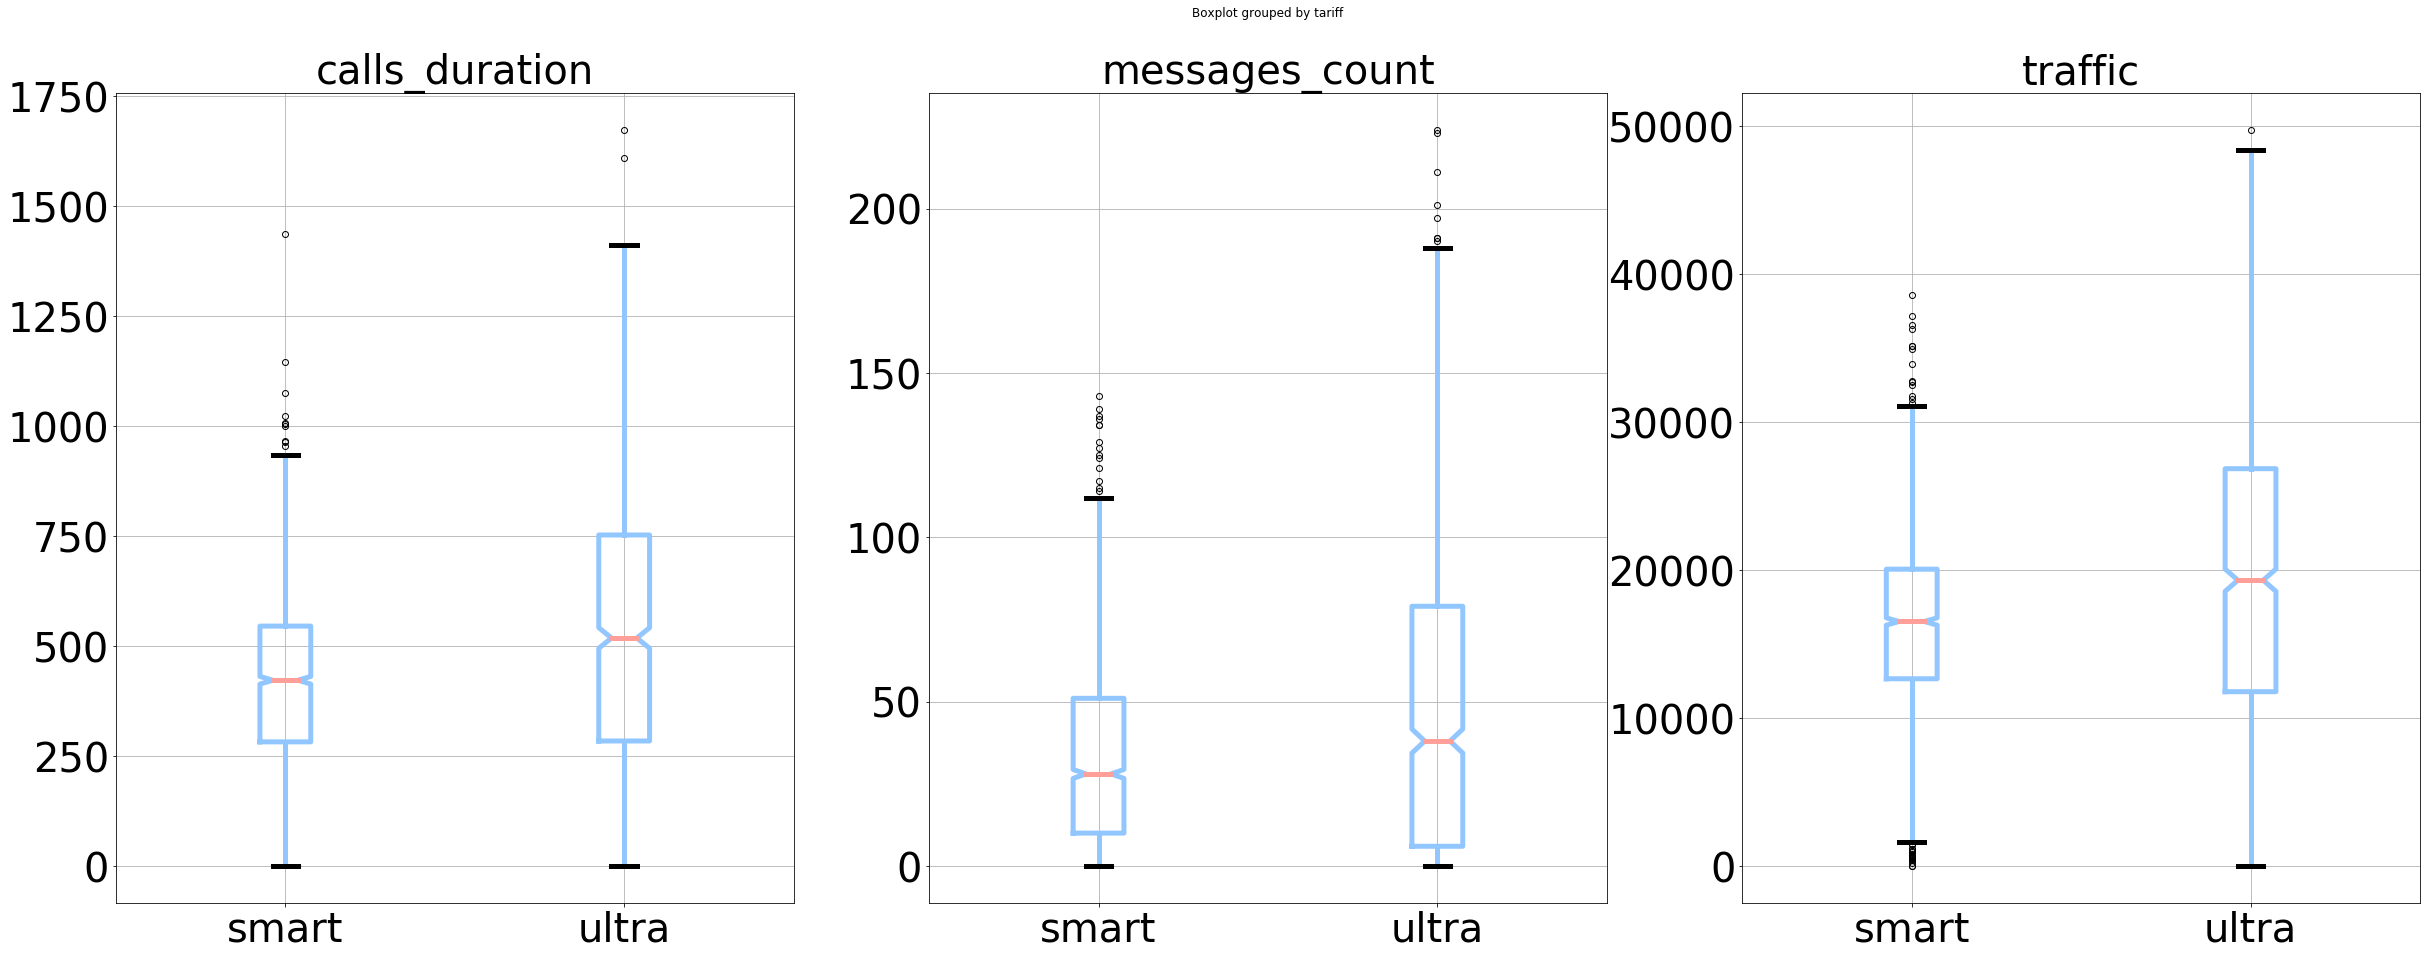

In [59]:
draw_box()

Рассчитаем интервалы данных.

In [60]:
def get_intervals(column, data_filter):
    
    if data_filter == 'tariff':
        format_name = column
        data1, data2 = 'smart', 'ultra'
        format_end1 = 'тарифа "Смарт"'
        format_end2 = 'тарифа "Ультра"'
    elif data_filter == 'is_Moscow':
        format_name = 'is_Moscow'
        data1, data2 = 0, 1
        format_end1 = 'для регионов'
        format_end2 = 'для Москвы'
    
    q1_1 = calculation_data[calculation_data[data_filter] == data1][column].quantile(0.25)
    q3_1 = calculation_data[calculation_data[data_filter] == data1][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    
    if data_filter == 'is_Moscow':
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 550, q1_1 - 1.5 * diff_1, 550)
    else:
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 0, q1_1 - 1.5 * diff_1, 0)
    
    right_int_1 = np.where( (q3_1 + 1.5 * diff_1) > 0, q3_1 + 1.5 * diff_1, 0)
    
    q1_2 = calculation_data[calculation_data[data_filter] == data2][column].quantile(0.25)
    q3_2 = calculation_data[calculation_data[data_filter] == data2][column].quantile(0.75)
    diff_2 = q3_2 - q1_2
    
    if data_filter == 'is_Moscow':
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 550, q1_2 - 1.5 * diff_2, 550)
    else:
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 0, q1_2 - 1.5 * diff_2, 0)
        
    right_int_2 = np.where( (q3_2 + 1.5 * diff_2) > 0, q3_2 + 1.5 * diff_2, 0)
    
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end1, left_int_1, right_int_1))
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end2, left_int_2, right_int_2))
    
    return (left_int_1, right_int_1), (left_int_2, right_int_2)

In [61]:
calls_int_smart, calls_int_ultra = get_intervals('calls_duration', 'tariff')

Границы интервала для столбца "calls_duration" тарифа "Смарт": 0.0 - 939.5
Границы интервала для столбца "calls_duration" тарифа "Ультра": 0.0 - 1454.0


In [62]:
sms_int_smart, sms_int_ultra = get_intervals('messages_count', 'tariff')

Границы интервала для столбца "messages_count" тарифа "Смарт": 0.0 - 112.5
Границы интервала для столбца "messages_count" тарифа "Ультра": 0.0 - 188.5


In [63]:
internet_int_smart, internet_int_ultra = get_intervals('traffic', 'tariff')

Границы интервала для столбца "traffic" тарифа "Смарт": 1543.0 - 31183.0
Границы интервала для столбца "traffic" тарифа "Ультра": 0.0 - 49480.0


[*к содержанию*](#back)

___
<a id = '3.2.'></a>
- **3.2. Гистограммы по тарифам**

Построим гистограммы по длительности звонков, количеству отправленных сообщений и количеству потраченного трафика в зависимости от тарифа. На гистограммах выведем даннеы по среднему, медиане, дисперсии и стандартному отклонению. Технически медиану можно не трогать, так как ранее отфильтровали данные (просто хочется посмотреть - какая разница между средним и медианой будет для отфильтрованных данных).

In [64]:
def plot_hist_comparison(data):
    
    ax = plt.gca()
    func_dict = {'Звонки': 'calls_duration', 'Сообщения': 'messages_count', 'Интернет': 'traffic'}
    xlims = [(calls_int_smart[0], calls_int_smart[1]), (calls_int_ultra[0], calls_int_ultra[1]),
             (sms_int_smart[0], sms_int_smart[1]), (sms_int_ultra[0], sms_int_ultra[1]),
             (internet_int_smart[0], internet_int_smart[1]), (internet_int_ultra[0], internet_int_ultra[1])]
    
    filt_column = func_dict[data]

    # оформление в зависимости от рассматриваемых данных
    if data == 'Звонки':
        title = 'Гистограмма длительности звонков, мин.'
        xlim1 = xlims[0]
        xlim2 = xlims[1]
        text_x = (58, 8)
        text_y = 118
        count_text_x = 1150
        count_text_y = 85
        alpha = 0.8
    elif data == 'Сообщения':
        title = 'Гистограмма количества отправленных сообщений, шт.'
        xlim1 = xlims[2]
        xlim2 = xlims[3]
        text_x = (5.5, 1)
        text_y = 200
        count_text_x = 148
        count_text_y = 255
        alpha = 1
    else:
        title = 'Гистограмма интернет-трафика, Мб'
        xlim1 = xlims[4]
        xlim2 = xlims[5]
        text_x = (3300, 200)
        text_y = 130
        count_text_x = 38000
        count_text_y = 95
        alpha = 0.8
    
    # получаем отфильтрованные от выбросов датафреймы
    filtered_smart_data = calculation_data[(calculation_data['tariff'] == 'smart') &
                                           (calculation_data[filt_column] >= xlim1[0]) &
                                           (calculation_data[filt_column] <= xlim1[1])][filt_column]
    filtered_ultra_data = calculation_data[(calculation_data['tariff'] == 'ultra') &
                                           (calculation_data[filt_column] >= xlim2[0]) &
                                           (calculation_data[filt_column] <= xlim2[1])][filt_column]
    # рисуем
    filtered_smart_data.plot(kind='hist', bins=40, figsize=(12,6), ec='black', ax=ax, color='#92c6ff', 
                             title=title, xlim=xlim1)
    filtered_ultra_data.plot(kind='hist', bins=70, figsize=(12,6), ec='black', ax=ax, color='#97F0AA', 
                             title=title, xlim=xlim2, alpha=alpha)
    
    # расчетные данные
    mean_smart = filtered_smart_data.mean()
    mean_ultra = filtered_ultra_data.mean()
    median_smart = filtered_smart_data.median()
    median_ultra = filtered_ultra_data.median()
    dispersion_smart = filtered_smart_data.var()
    dispersion_ultra = filtered_ultra_data.var()
    std_smart = filtered_smart_data.std()
    std_ultra = filtered_ultra_data.std()
    
    if data == 'Сообщения':
        smart_data = 'Среднее - {:.2f}\nМедиана - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_smart, median_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.2f}\nМедиана - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_ultra, median_ultra, dispersion_ultra, std_ultra)
    else:
        smart_data = 'Среднее - {:.0f}\nМедиана - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_smart, median_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.0f}\nМедиана - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_ultra, median_ultra, dispersion_ultra, std_ultra)
    
    legend_second = plt.legend([smart_data, ultra_data], prop={'size':10.5}, 
                                framealpha=0, bbox_to_anchor=(1.0,0.32), loc=4)
    
    
    plt.gca().add_artist(legend_second)
    
    plt.legend(['Смарт', 'Ультра'], prop={'size':12})
    ax.text(count_text_x, count_text_y, 'Расчетные данные', fontweight='bold', fontsize='large')

Строим гистограммы

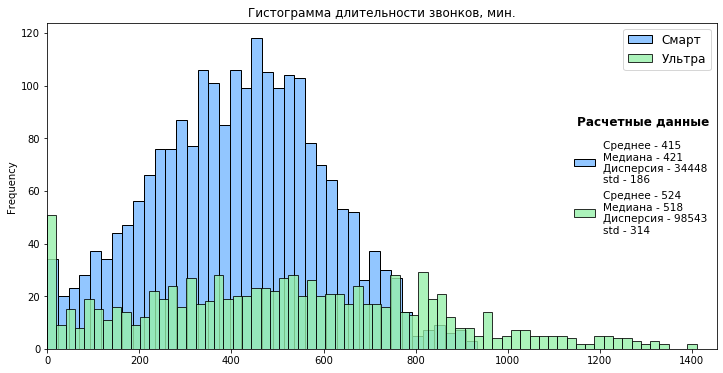

In [65]:
plot_hist_comparison('Звонки')

Тариф "Смарт" - в основном длительность разговоров 240 - 580 минут. При месячном лимите в 500 минут - медиана составляет 421, т.е. пользователи почти полностью проговаривают лимит.   

Тариф "Ультра" - длительность разговоров этого тарифа почти равномерно распределена по пользователям. При месячном лимите в 3000 минут - медиана составляет 518, т.е. пользователи выговаривают лишь примерно 16% предоставленного лимита.

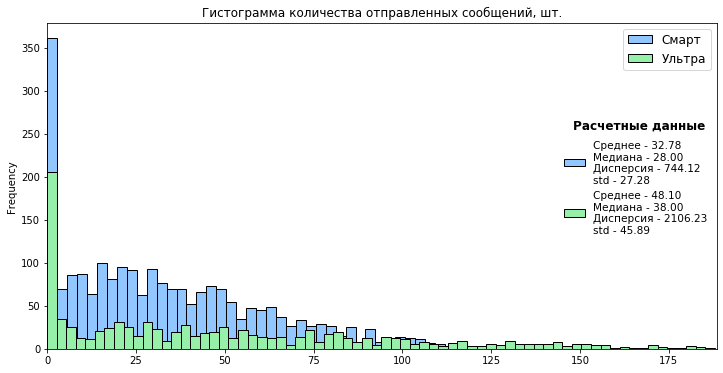

In [66]:
plot_hist_comparison('Сообщения')

Тут ситуация для двух тарифов схожа - абоненты редко отправляют сообщения.   
При этом для тарифа смарт пользователи снова автивнее пользуются этой услугой, многие даже превышают предоставленный лимит.

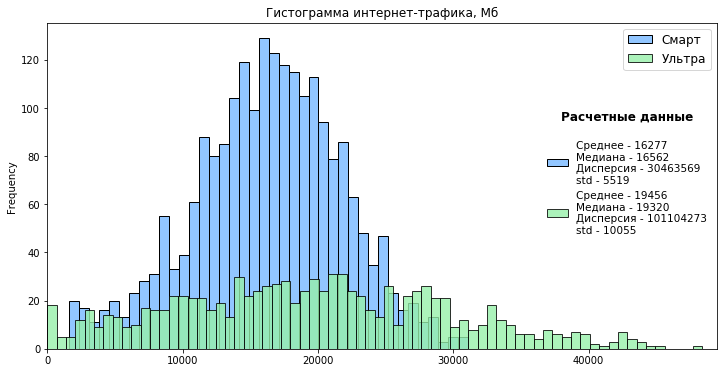

In [67]:
plot_hist_comparison('Интернет')

Абоненты "Смарт" в среднем в месяц используют от 14 до 20 Гб трафика.   
Причем медиана равна 16,5 Гб, что выбивается за предоставляемый лимит в 15 Гб.
Абоненты "Ультра" больше пользуются интернетом: медиана равна 19 Гб.

[*к содержанию*](#back)

___
<a id = 'step_4'></a>
### Шаг 4. Проверка гипотез
___
___

___
<a id = '4.1.'></a>
- **4.1. Средняя выручка абонентов в зависимости от тарифа**

**H0 (нулевая гипотеза)** - предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка абонента "Смарт" не отличается от средней выручки абонента "Ультра".   
**H1 (альтернативная гипотеза)** - средняя выручка абонента "Смарт" отличается от средней выручки абонента "Ультра".

Как и раньше нам сначала требуется отфильтровать данные.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.93, 'Boxplot по выручке')

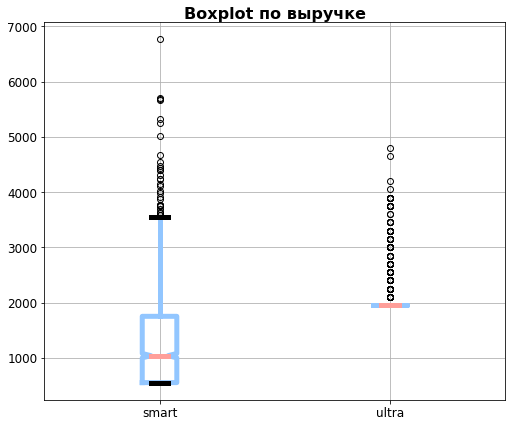

In [68]:
ax = calculation_data.boxplot(column='monthly_payment', by='tariff', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))
ax.set_title('')
ax.title.set_size(40)
ax.set_xlabel('')
plt.suptitle('Boxplot по выручке', y=0.93, fontsize=16, fontweight='bold')

In [69]:
revenue_int_smart, revenue_int_ultra = get_intervals('monthly_payment', 'tariff')

Границы интервала для столбца "monthly_payment" тарифа "Смарт": 0.0 - 3550.0
Границы интервала для столбца "monthly_payment" тарифа "Ультра": 1950.0 - 1950.0


In [70]:
smart_mean_revenue = calculation_data[(calculation_data['tariff'] == 'smart') &
                                      (calculation_data['monthly_payment'] >= revenue_int_smart[0]) &
                                      (calculation_data['monthly_payment'] <= revenue_int_smart[1])]['monthly_payment']

ultra_mean_revenue = calculation_data[(calculation_data['tariff'] == 'ultra') &
                                      (calculation_data['monthly_payment'] >= revenue_int_ultra[0]) &
                                      (calculation_data['monthly_payment'] <= revenue_int_ultra[1])]['monthly_payment']

Рассчитаем p-value.   
Используем ttest_ind, так как работаем с независимыми выборками.

In [71]:
from scipy.stats import ttest_ind

In [72]:
stat, p = ttest_ind(smart_mean_revenue, ultra_mean_revenue)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nalpha = 0.05')

t = -27.93259650896307
p-value = 4.6244593529e-153

alpha = 0.05


Отвергаем нулевую гипотезу.   
Верно утверждение, что средняя выручка абонентов рассматриваемых тарифов отличаются.

In [73]:
print('Средняя выручка с  абонентов "Смарт" в месяц - {:.2f}'.format(smart_mean_revenue.mean()))
print('Средняя выручка с абонентов "Ультра" в месяц - {:.2f}'.format(ultra_mean_revenue.mean()))

Средняя выручка с  абонентов "Смарт" в месяц - 1249.74
Средняя выручка с абонентов "Ультра" в месяц - 1950.00


Что и логично, при том, что абонентская плата "Ультра" больше чем в три раза дороже. Даже то, что абоненты "Смарт" чаще дозаказывают услуги позволяет им лучше контролировать свои расходы в зависимости от потребностей.

[*к содержанию*](#back)

___
<a id = '4.2.'></a>
- **4.2. Средняя выручка абонентов в зависимости от региона**

**H0 (нулевая гипотеза)** - предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка абонентов не зависит от региона.   
**H1 (альтернативная гипотеза)** - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Посчитаем среднюю месячную выручку по Москве и по остальным регионам.   
Категорезируем данные: Москва (0) или регион (1).

In [74]:
calculation_data['is_Moscow'] = np.where(calculation_data['city'] == 'Москва', 1, 0)

In [75]:
display(calculation_data.head())

,user_id,month,calls_count,calls_duration,messages_count,traffic,tariff,city,tariff_cost,minutes_overrun,messages_overrun,traffic_overrun,payment_over_the_limit,monthly_payment,over_limits,is_Moscow
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0


Как и раньше нам сначала требуется отфильтровать данные.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


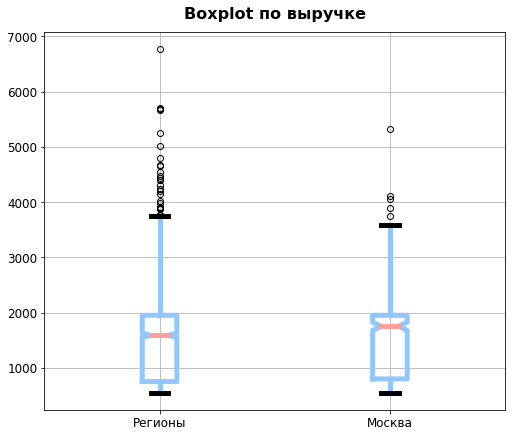

In [76]:
ax = calculation_data.boxplot(column='monthly_payment', by='is_Moscow', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Регионы'
labels[1] = 'Москва'

ax.set_xticklabels(labels)

plt.suptitle('Boxplot по выручке', y=0.95, fontsize=16, fontweight='bold')

ax.set_xlabel('')
ax.set_title('')
ax.title.set_size(40)

In [77]:
revenue_int_smart, revenue_int_ultra = get_intervals('monthly_payment', 'is_Moscow')

Границы интервала для столбца "monthly_payment" для регионов: 550.0 - 3750.0
Границы интервала для столбца "monthly_payment" для Москвы: 550.0 - 3678.0


In [78]:

moscow_revenue = calculation_data[(calculation_data['city'] == 'Москва') &
                                  (calculation_data['monthly_payment'] >= revenue_int_smart[0]) &
                                  (calculation_data['monthly_payment'] <= revenue_int_smart[1])]['monthly_payment']

regions_revenue = calculation_data[(calculation_data['city'] != 'Москва') &
                                  (calculation_data['monthly_payment'] >= revenue_int_ultra[0]) &
                                  (calculation_data['monthly_payment'] <= revenue_int_ultra[1])]['monthly_payment']

Рассчитаем p-value.
Используем ttest_ind, так как работаем с независимыми выборками.

In [79]:
stat, p = ttest_ind(moscow_revenue, regions_revenue)
print('t = {}\np-value = {:.2}'.format(stat, p))
print('\nalpha = 0.05')

t = 1.49291699198228
p-value = 0.14

alpha = 0.05


Нулевую гипотезу отвергнуть не получается.
Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

In [80]:
print('Средняя выручка с абонента в в месяц в Москве: {:.2f}'.format(moscow_revenue.mean()))
print('Средняя выручка с абонента в месяц в регионах: {:.2f}'.format(regions_revenue.mean()))

Средняя выручка с абонента в в месяц в Москве: 1532.38
Средняя выручка с абонента в месяц в регионах: 1483.28


Стоит отметить, что этот показатель может поменяться. Так как тарифы новые и не так много абонентов к ним подключено. Возможно через несколько лет эти тарифы либо останутся популярными только в Москве, или только в регионах, или один будет популярен в Москве, другой - в регионах. В общем это тот показатель, за которым следует пристально следить.

[*к содержанию*](#back)

___
<a id = 'step_5'></a>
### Шаг 5. Общий вывод
___
___

Тариф "Смарт" за отчетный период:
 - принес большую выручку;
 - имеет больше абонентов;
 - имеет меньшую ежемесячную выручку;
 - имеет больше превышений лимитов, установленных тарифом (по каждой услуге).

Тариф "Ультра" за отчетный период:
 - принес меньшую выручку;
 - имеет меньше абонентов;
 - имеет большую ежемесячную выручку;
 - имеет меньшее превышений лимитов, установленных тарифом (при этом превышаются лимиты только интернет-трафика).

Скорее всего за счет большой разницы в абонентской плате, и условиями не коррелирующими с потребностями среднего абонента средняя выручка абонентов каждого тарифа отличается.
За год существования тарифов число абонентов не успело сильно вырасти и распространиться по России. Скорее всего за счет этого средняя выручка с пользователя Москвы не отличается от средней выручки пользователя региона. За этим параметром неоходимо пристально следить, так как он будет значительно меняться во времени существования тарифов.

В идеале "Мегалайн" должен объеденить сильные стороны каждого тарифа и отсечь слабые, создав некий промежуточный тариф.   
Например создать тариф с лимитами по минутам разговора и сообщениям тарифа "Смарт" и интернет пакетом тарифа "Ультра".
Средний пользователь тарифа "Смарт" дозаказывает 2 Гб интернета на 400 рублей, т.н. абонентскую плату нового тарифа можно установить в 950 рублей.